# Modulok
## Modulok használata

A modul első megközelítésben egy fájl, mely Python definíciókat, utasításokat tartalmaz. A fájl neve = a modul neve `.py` kiterjesztéssel.
Modulon belül a modul nevét a `__name__` változó tartalmazza.
Természetesen mi magunk is tudunk írni modulokat, amelyeket mások is használhatnak.

### Import
Ha telepítettük a Pythont, a bépített modulokat is megkapjuk. Ezeket egyszerűen tudjuk importálni, sőt sokat közülük már használtunk is.

In [1]:
import sys
print(sys.path)

['/home/wettl/okt/info/2/2021', '/home/wettl/anaconda3/lib/python38.zip', '/home/wettl/anaconda3/lib/python3.8', '/home/wettl/anaconda3/lib/python3.8/lib-dynload', '', '/home/wettl/anaconda3/lib/python3.8/site-packages', '/home/wettl/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/wettl/.ipython']


A `sys` egy beépített modul, a rendszerrel kapcsolatos információkat tudjuk lekérdezni és használni (pl. parancssori argumentumok). Fent a `sys.path` változót irattuk ki, mely azon könyvtárak listája, ahol pl. a Python a modulokat keresi. Az `import valami` sor végrehajtásakor a Python a `valami` nevű modult először a beépített modulok között keresi, majd egy `valami.py` nevű fájlt keres a `sys.path` helyek egyikén. A `sys.path` akár változtatható is.

Létrehozhatjuk modulok úgynevezett csomagjait (packages), amelyek egy könyvtárstruktúrába szervezett fájlokból állnak (ld. a témáról bővebben: https://docs.python.org/3/tutorial/modules.html)
Importálni lehet egy egész fájlt, azaz egy egész modult, egy részmodult, vagy akár ezeknek egy vagy több függvényét. A következő betöltési módok a leggyakoribbak:
```Python
import <modul>
import <modul> as <name>
from <modul> import <identifier>
from <modul.identifier> import <identifier>
```
Például:

In [2]:
from itertools import permutations
for p in permutations(['A', 'B', 'C']):
    print(p)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


### Relatív import 
Importálhatunk fájlokat abból a könyvtárból, ahol éppen vagyunk, ahonnan a Python, ill. a jupyter fut.
Írjuk a következő kódot egy `myfns.py` nevű fájlba:
```Python
def foo():
    print("FoO")

def bar():
    print("BaR")
```
Ezután, betölthetjük őket az
```Python
import myfns
```
paranccsal, vagy csak egy függvényt a
```Python
from myfns import foo
```
paranccsal. A függvények elérése függ a betöltés módjától:

In [3]:
import myfns
myfns.bar()    # így eléri
print(__name__)
print(myfns.__name__)

BaR
__main__
myfns


In [4]:
foo()          # ez itt hibaüzenetet ad

NameError: name 'foo' is not defined

In [5]:
from myfns import foo
foo()

FoO


## numpy alapok
A `numpy` numerikus számításokra tervezett [Python modul](https://numpy.org/). (Ha otthon szeretnénk használni, akkor az [Anaconda](https://www.anaconda.com/products/individual) ezt is tartalmazza mindhárom oprendszeren. Telepítés után keressünk egy szimpatikus mappát, ahova dolgozni szeretnénk, majd adjuk ki a `jupyter notebook` parancsot Windows command line-ban, illetve Linux parancssorban.)

Először importáljuk a `numpy` modult. Érdemes `import numpy as np` módon használni, hiszen ilyenkor `numpy` helyett elég az `np`.

A numpy legfontosabb összetevője az `array`, ami listák listájából 2D, listák listájánal listájából 3D... tömböt kreál (Python lista szteroidokon). A másik az `arange`, ami a `range`-hez hasonlóan működik, de azonnal tömböt hoz létre. Ez átméretezhető egy tömbbé a `reshape` függvénnyel:

In [6]:
import numpy as np
x = np.arange(1, -1, -0.2)
y = np.array([[1, 2, 3], [1, 2, 4]])
z = np.arange(8).reshape(2, 2, 2)

In [7]:
print(x)
print(y)
print(z)

[ 1.00000000e+00  8.00000000e-01  6.00000000e-01  4.00000000e-01
  2.00000000e-01  2.22044605e-16 -2.00000000e-01 -4.00000000e-01
 -6.00000000e-01 -8.00000000e-01]
[[1 2 3]
 [1 2 4]]
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


In [8]:
print(x.dtype, y.dtype, z.dtype)
print(x.ndim, y.ndim, z.ndim)
print(x.shape, y.shape, z.shape)

float64 int64 int64
1 2 3
(10,) (2, 3) (2, 2, 2)


A `numpy.ndarray` típusú változókon végezhetünk műveleteket, sőt, az alapműveletek többsége működik, de az ökölszabály az, hogy elemenként értelmezzük őket.

In [9]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
print(type(a), type(b))
print(a + b)
print(a - b)
print(b / (b+1.0))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[20 31 42 53]
[20 29 38 47]
[0.         0.5        0.66666667 0.75      ]


Hasonlóan lista és egy elem között is értelmezzük az alapműveleteket. Ilyenkor a lista minden elemére elvégezzük a műveleteket és az eredmény ez a lista.

In [10]:
b = np.arange(10)
print(b)
print(b ** 2)
print(b + 10)
print(b % 3 == 1)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]
[10 11 12 13 14 15 16 17 18 19]
[False  True False False  True False False  True False False]


Az előzőekből szinte kikövetkeztethető, hogy a mátrixszorzás sem a `*` művelettel történik, helyette a `@` művelet vagy a `.dot` metódus használható:

In [11]:
A = np.arange(2, 6).reshape(2, 2)
B = np.arange(3, -1, -1).reshape(2, 2)
print(A)
print(B)

[[2 3]
 [4 5]]
[[3 2]
 [1 0]]


In [12]:
print(A * B)     # elementwise
print(A @ B)     # matrix product
print(A.dot(B))  # matrix product

[[6 6]
 [4 0]]
[[ 9  4]
 [17  8]]
[[ 9  4]
 [17  8]]


A Python indexelési lehetőségei mellett további kényelmes megoldások is használhatók:

In [13]:
x = np.arange(15).reshape(3, 5)
print(x)
print(x[0:2])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


Sőt, indexelhetünk oszlopszinten is.

In [14]:
print(x[2, :3])
print(x[:, 3]) 

[10 11 12]
[ 3  8 13]


In [15]:
print(x[:, [3]])

[[ 3]
 [ 8]
 [13]]


In [16]:
a = np.arange(12)**2
i = np.array([1, 5, 1, 3, 8])
print(a[i])

[ 1 25  1  9 64]


Függvényeket is hívhatunk elemenként. Sőt, a listaműveletek is elérhetők, persze `np` előtaggal, hiszen `array` típusra a normál Python függvények nem működnek. Átlagot, szórást is egy sorban számolhatunk.

In [17]:
x = np.log(np.arange(2, 10, 0.5))
print(x)
print(x.sum())
print(x.mean())
print(x.std())

[0.69314718 0.91629073 1.09861229 1.25276297 1.38629436 1.5040774
 1.60943791 1.70474809 1.79175947 1.87180218 1.94591015 2.01490302
 2.07944154 2.14006616 2.19722458 2.2512918 ]
26.457769829012314
1.6536106143132696
0.4600673068044455


A mátrixalapú nyelvek (Octave, Matlab) több parancsa itt is megjelenik: működik a `zeros` és a `ones`, az identikus mátrix az `eye` mögött rejtőzik (`I`, ejtsd *áj*, `eye` ejtsd *áj*).

In [18]:
print(np.zeros([2, 3]))
print(np.ones([3, 1]))      # float type
print(np.eye(4, dtype=int)) # int type

[[0. 0. 0.]
 [0. 0. 0.]]
[[1.]
 [1.]
 [1.]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


Véletlen számokat, sőt véletlen vektorokat vagy mátrixokat is generálhatunk. Itt a $[0,1)$ intervallumból egyenletes eloszlás szerint:

In [19]:
np.random.rand(3,4)

array([[0.60092748, 0.30611471, 0.20208398, 0.39840629],
       [0.78157605, 0.45320496, 0.45390118, 0.43948586],
       [0.25838165, 0.64739867, 0.31323661, 0.13181325]])

Mindig ugyanazt a sorozatot generálja, ha előtte beállítjuk a `seed` értékét:

In [20]:
np.random.seed(2)
np.random.rand(2,3)

array([[0.4359949 , 0.02592623, 0.54966248],
       [0.43532239, 0.4203678 , 0.33033482]])

Egészek sorozata is generálható, például kockadobások:

In [21]:
np.random.randint(1,7,10)

array([4, 6, 3, 5, 5, 5, 6, 4, 5, 3])

## Plot
Függvények ábrázolására a [matplotlib](https://matplotlib.org/) csomagot használjuk. A matplotlib használatának módja változtatható a `%matplotlib` ún. *magic* függvénnyel. (A *magic* függvények az IPython függvényei, melyekkel a környezet viselkedése kezelhető, ezek egy részét a `jupyter` is használja.)

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Először egy egyszerű plot.

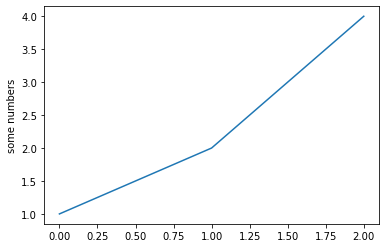

In [23]:
plt.plot([1,2,4])
plt.ylabel('some numbers')
plt.show()

Látjuk, hogy nem szinbolikusan számol, hanem egyszerűen összeköti a számokat vonalakkal. Szinuszgörbét is hasonlóan rajzolunk. Az `np.sin` a lista minden elemére számol szinuszt. Itt az `arange` helyett inkább a `linspace` függvényt használjuk, mely adott intervallumon helyez el adott számú osztópontot:

In [24]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

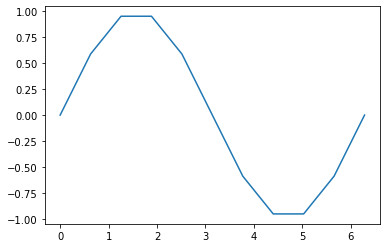

In [25]:
plt.plot(np.linspace(0, 2*np.pi, 11), 
         np.sin(np.linspace(0, 2*np.pi, 11)))
plt.show()

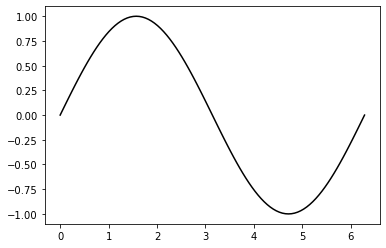

In [26]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'k')
plt.show()

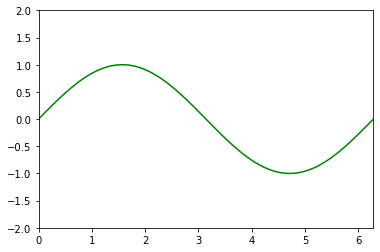

In [27]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'g')
plt.axis([0, 2*np.pi, -2, 2])
plt.show()

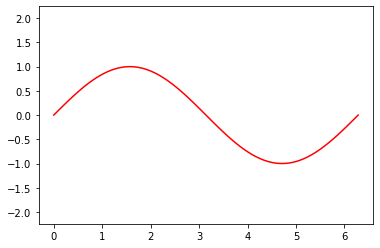

In [28]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'r')
plt.axis('equal')
plt.show()

És a végére egy kis Monte–Carlo-módszer. Generálunk véletlen pontokat a $[-2,2]\times[0,1]$ téglalapban. A $[0,1]$ intervallumon egyenletes eloszlás szerint generált véletlen számokból egyszerű transzformációval kaphatunk a $[-2,2]$ intervallumon egyenletes eloszlásúakat. A `J` tömbben azon $(x,y)$ pontok indexeit tároljuk, ahol $e^{-x^2} > y$. Mivel a téglalap területe 4, az ilyen pontok aránya az teljes ponthalmazon belül, néggyel szorozva egy közelítést ad $\int_{-2}^2e^{-x^2}\,\mathrm{d}x$-re.

Felhasználjuk a `np.where()` függvényt, amelynek ha csak egyetlen, mátrix elemein logikai értéket visszaadó kifejezést adunk meg, akkor eredményül azoknak az elemeknek az indexeit adja vissza, ahol az érték igaz (vagy nem 0). Ha a tömb 2-dimenziós, a tuple első eleme az első indexek tömbjét, a második eleme a második indexek tömbjét adja vissza. 

In [29]:
a = np.arange(9).reshape(3, 3)
print(a)
print((np.where(a % 2)))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(array([0, 1, 1, 2]), array([1, 0, 2, 1]))


Ha a tömb egydimenziós, a tuple egyetlen tömböt ad vissza:

In [30]:
b = np.arange(5)
print(b)
print((np.where(b % 2)))

[0 1 2 3 4]
(array([1, 3]),)


In [31]:
n = 500000
X = np.random.rand(n, 2)
X[:, 0] = X[:, 0]*4-2     # elemek a [-2,2] x [0,1] téglalapból
J = np.where(X[:, 1] < np.exp(-X[:, 0]**2))[0]
print(f"J = {J},\naz arány = {4 * len(J) / n}")

J = [     2      3      4 ... 499997 499998 499999],
az arány = 1.757776


In [32]:
from sympy import *
x = Symbol('x')
integrate(exp(-x**2), (x, -2, 2))

sqrt(pi)*erf(2)

Ezzel még nem jutottunk sokra, mert 
$\operatorname{erf}x = \frac{2}{\sqrt\pi}\int_0^x e^{-t^2}\,\mathrm dt$. Viszont az `n()` metódus numerikus közelítést ad a kifejezésre:


In [33]:
_.n()

1.76416278152484

Nézzük meg rajzon.

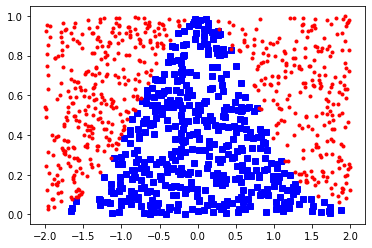

In [34]:
Xp = X[:1000]
Ip = [i for i in range(1000) if i in J]
Inp = [i for i in range(1000) if i not in J]
plt.plot(Xp[Ip, 0], Xp[Ip, 1], 'bs', Xp[Inp, 0], Xp[Inp, 1], 'r.')
# plt.axis('equal')
plt.show()